In [1]:
# !pip install tensorflow

In [2]:
# !pip install tensorflow-gpu

In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import tensorflow_docs as tfdocs
# import tensorflow_docs.modeling
# import tensorflow_docs.plots

print(tf.__version__)

2.4.1


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
print(len(train_labels), pd.Series(train_labels).unique())

60000 [9 0 3 2 7 5 1 6 4 8]


In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
print(len(test_labels), pd.Series(test_labels).unique())

10000 [9 2 1 6 4 5 7 3 8 0]


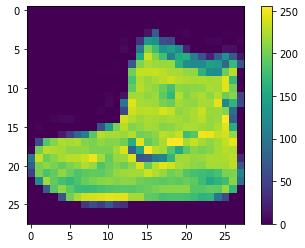

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

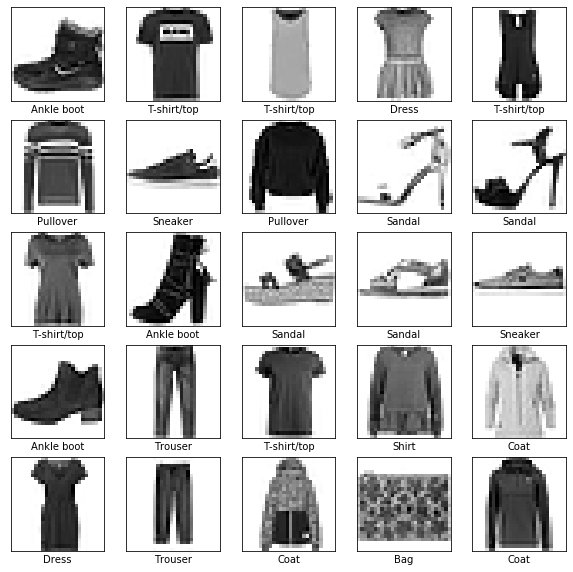

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
fit_model = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2336 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2191 - accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2224 - accuracy: 0.9150
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2128 - accuracy: 0.9193
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2030 - accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2032 - accuracy: 0.9239
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1861 - accuracy: 0.9303
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1889 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1809 - accuracy: 0.9314
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.179

In [20]:
# plotter = tfdocs.plots.HistoryPlotter(metric = 'sparse_categorical_crossentropy', smoothing_std=10)
# plotter.plot(fit_model)
# plt.ylim([0.5, 0.7])

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3653 - accuracy: 0.8855

Test accuracy: 0.8855000138282776


In [22]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([1.1465259e-09, 1.2545141e-12, 1.1853958e-13, 1.1394938e-11,
       7.9637157e-14, 7.9601259e-06, 5.9716970e-10, 1.5707304e-03,
       7.7342690e-12, 9.9842131e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

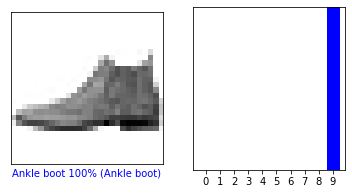

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

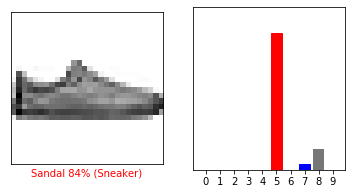

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

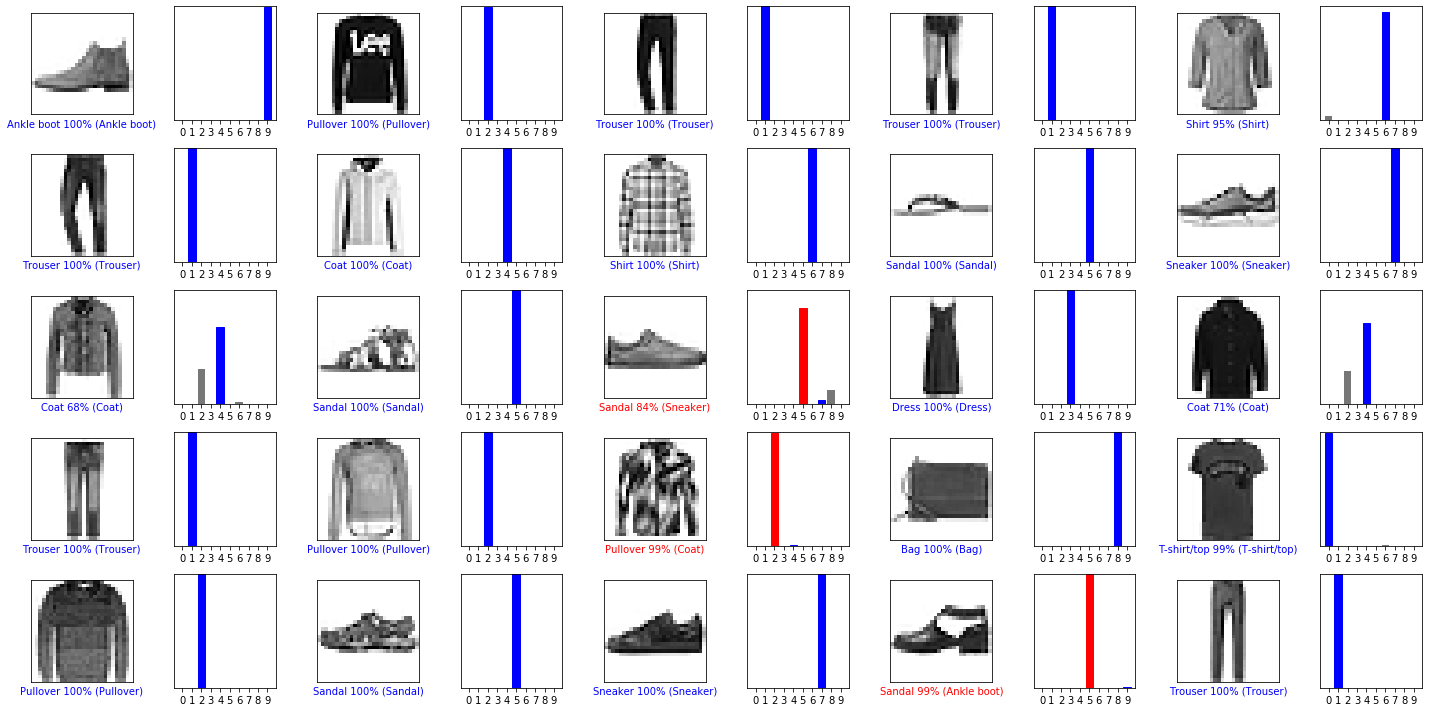

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
